<a href="https://colab.research.google.com/github/Zkeera/Project-Analisis-Data/blob/main/noteboook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mohammad Taqi Ashiddiqi]
- **Email:** [mohammadtaqi029@gmail.com]
- **ID Dicoding:** [MC361D5Y0526]




## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana perbedaan pola penyewaan antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/Zkeera/Project-Analisis-Data/refs/heads/main/Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/Zkeera/Project-Analisis-Data/refs/heads/main/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
day_missing = day_df.isnull().sum()

In [7]:
hour_missing = hour_df.isnull().sum()

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Tabel** hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [13]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Membersihkan Tabel** day_df

**Membersihkan Tabel** hour_df

In [14]:
day_df = day_df.drop_duplicates()

In [15]:
hour_df = hour_df.drop_duplicates()

In [16]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [17]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Mapping nilai numerik

In [18]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [19]:
day_df['season'] = day_df['season'].map(season_mapping)

In [20]:
hour_df['season'] = hour_df['season'].map(season_mapping)

In [21]:
weather_avg = day_df.groupby('weathersit')['cnt'].mean().reset_index()

weather_labels = {
    1: 'Cerah / Sedikit Berawan',
    2: 'Mendung',
    3: 'Hujan Ringan / Salju Ringan',
    4: 'Hujan Lebat / Badai'
}
weather_avg['weathersit'] = weather_avg['weathersit'].map(weather_labels)

**Missing Values**

In [22]:
print("Missing Values after Cleaning:")

Missing Values after Cleaning:


In [23]:
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [24]:
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Karena tidak ada data yang terduplikasi maka tidak diperlukan cleaning data

## Exploratory Data Analysis (EDA)

### Explore day_df dan hour_df

In [25]:
day_info = day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [26]:
(day_df.dtypes['dteday'])

dtype('<M8[ns]')

In [27]:
hour_info = hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [28]:
(hour_df.dtypes['dteday'])

dtype('<M8[ns]')

In [30]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Distribusi Data

In [33]:
day_df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [34]:
hour_df.describe()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


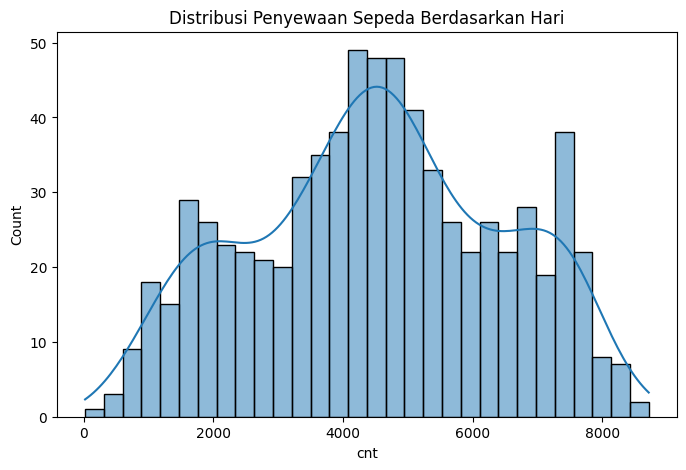

In [40]:
# Visualisasi distribusi jumlah penyewaan sepeda
plt.figure(figsize=(8,5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Hari')
plt.show()

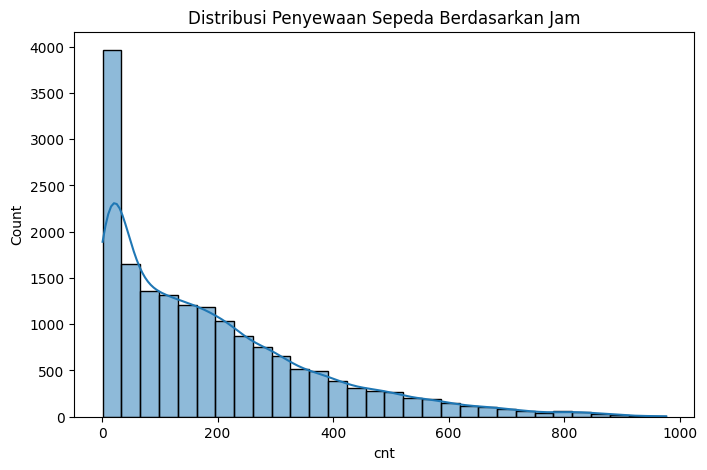

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Jam')
plt.show()

## Korelasi Antar Variabel

Menganalisis hubungan antara jumlah penyewaan sepeda dengan variabel lain.

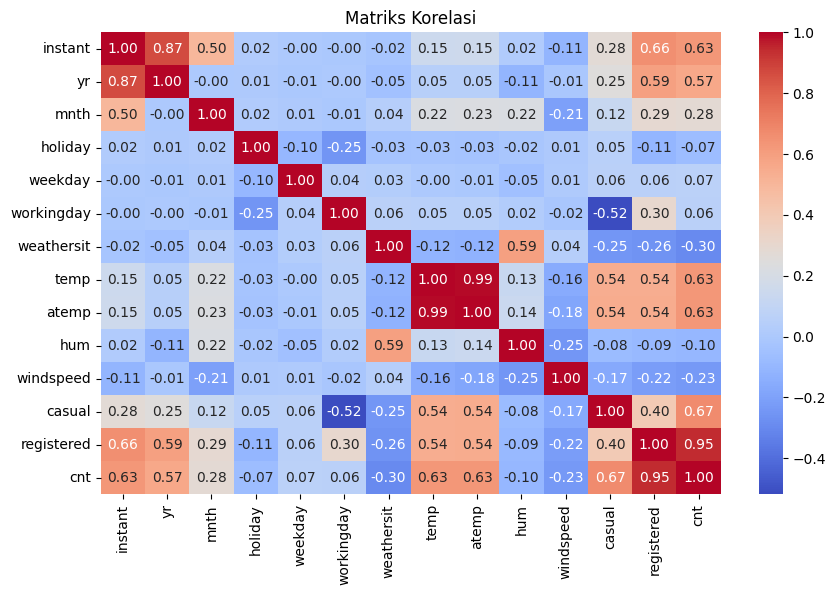

In [44]:
# Menampilkan matriks korelasi
plt.figure(figsize=(10,6))
sns.heatmap(day_df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Berdasarkan Hari')
plt.show()

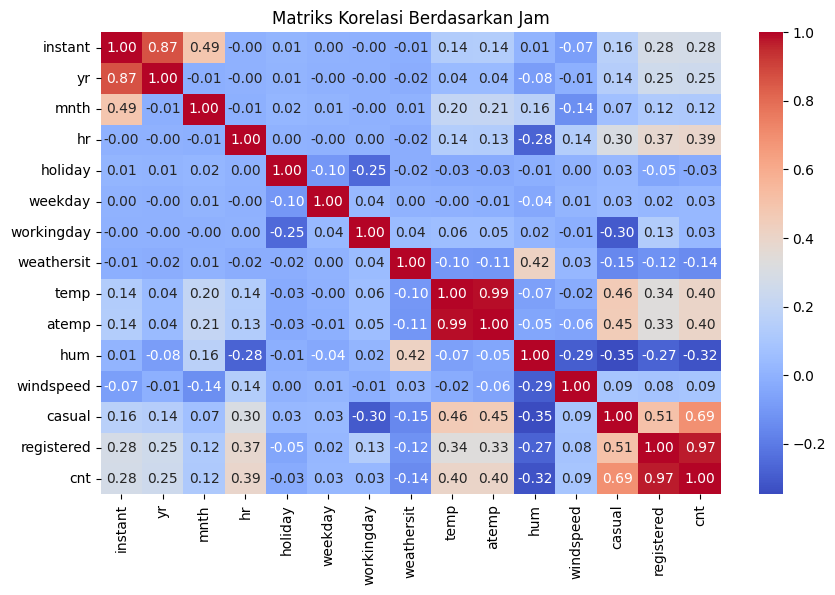

In [45]:
# Menampilkan matriks korelasi
plt.figure(figsize=(10,6))
sns.heatmap(hour_df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Berdasarkan Jam')
plt.show()

## Agregasi Data

berdasarkan hari kerja dan akhir pekan untuk memahami pola penyewaan.

In [50]:
# Agregasi jumlah penyewaan berdasarkan hari kerja
day_df.groupby('workingday')['cnt'].mean()

,cnt
workingday,
0,4330.168831
1,4584.820000


In [51]:
hour_df.groupby('workingday')['cnt'].mean()

,cnt
workingday,
0,181.405332
1,193.207754


## Visualization & Explanatory Analysis

### Pengaruh cuaca terhadap jumlah penyewaan sepeda

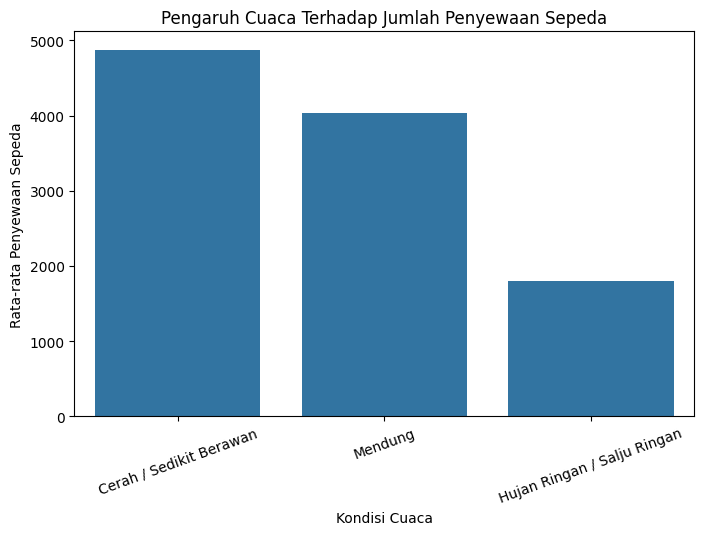

,weathersit,cnt
0,Cerah / Sedikit Berawan,4876.786177
1,Mendung,4035.862348
2,Hujan Ringan / Salju Ringan,1803.285714


In [52]:
# Visualisasi pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_avg, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=20)
plt.show()

# Menampilkan data rata-rata penyewaan per kondisi cuaca
weather_avg.sort_values(by='cnt', ascending=False)

### Perbedaan pola penyewaan antara hari kerja dan akhir pekan

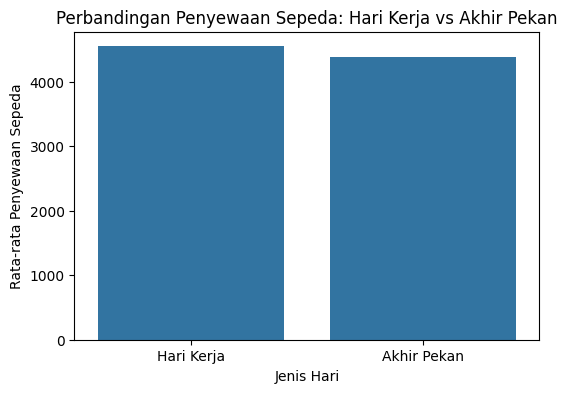

,is_weekend,cnt
0,Hari Kerja,4550.566219
1,Akhir Pekan,4389.685714


In [53]:
# Menambah kolom baru untuk menunjukkan akhir pekan atau hari kerja
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x == 0 or x == 6 else 0)

# Menghitung rata-rata penyewaan untuk hari kerja dan akhir pekan
weekend_avg = day_df.groupby('is_weekend')['cnt'].mean().reset_index()
weekend_avg['is_weekend'] = weekend_avg['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Visualisasi perbedaan penyewaan antara hari kerja dan akhir pekan
plt.figure(figsize=(6, 4))
sns.barplot(data=weekend_avg, x='is_weekend', y='cnt')
plt.title('Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

# Menampilkan data rata-rata penyewaan per jenis hari
weekend_avg.sort_values(by='cnt', ascending=False)

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

**Hasil Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda**
- Cuaca cerah atau sedikit berawan memiliki rata-rata penyewaan tertinggi (±4877 sepeda).
- Cuaca mendung sedikit lebih rendah (±4036 sepeda).
- Hujan ringan atau salju ringan secara signifikan menurunkan penyewaan (±1803 sepeda).
- Tidak ada data untuk kondisi hujan lebat atau badai (kategori 4).

### Pertanyaan 2: Bagaimana perbedaan pola penyewaan antara hari kerja dan akhir pekan?

**Hasil Analisis Penyewaan Sepeda: Hari Kerja vs Akhir Pekan**
- Hari kerja memiliki rata-rata penyewaan sedikit lebih tinggi (±4551 sepeda)
dibandingkan dengan akhir pekan (±4390 sepeda).
- Perbedaannya tidak terlalu signifikan, namun menunjukkan tren sedikit lebih ramai saat hari kerja.

### **Conclussion**

- Data telah dibersihkan dari duplikasi dan dikonversi ke format yang lebih mudah dipahami.

- Analisis distribusi menunjukkan pola penggunaan sepeda yang berbeda sepanjang musim.

- Korelasi menunjukkan faktor-faktor yang memengaruhi jumlah pengguna sepeda.

- Data dapat digunakan lebih lanjut untuk model prediksi atau rekomendasi.

- Penyewaan sepeda tertinggi terjadi saat cuaca cerah atau sedikit berawan dengan rata-rata sekitar 4.877 sepeda, sedangkan pada cuaca mendung sedikit lebih rendah, sekitar 4.036 sepeda. Penyewaan menurun secara signifikan saat hujan ringan atau salju ringan, dengan rata-rata sekitar 1.803 sepeda, dan tidak terdapat data untuk kondisi hujan lebat atau badai.

- Rata-rata penyewaan sepeda pada hari kerja sedikit lebih tinggi, sekitar 4.551 sepeda, dibandingkan dengan akhir pekan yang mencapai sekitar 4.390 sepeda. Meskipun perbedaannya tidak terlalu signifikan, terdapat tren penyewaan yang sedikit lebih ramai pada hari kerja.